# Sarcasm Detection Using Bernoulli Naive Bayes Classifier

## Importing Libraries

In [46]:
import numpy as np 
import pandas as pd 
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [2]:
df = pd.read_json('Sarcasm.json', lines=True)

In [3]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [4]:
# Rows and Columns
df.shape

(26709, 3)

In [5]:
# Checking for Null Values
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [6]:
# Checking for Duplicated Values
df.duplicated().sum()

1

In [7]:
# Dropping the Duplicated Values
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26708 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26708 non-null  object
 1   headline      26708 non-null  object
 2   is_sarcastic  26708 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 834.6+ KB


In [10]:
# Dropping Article Link Column
df = df.drop('article_link', axis=1)

In [11]:
# Mapping Numerical Values to String Values
df['is_sarcastic'] = df['is_sarcastic'].map({0:'Not Scarcasm', 1:'Sarcasm'})

In [12]:
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,Not Scarcasm
1,the 'roseanne' revival catches up to our thorn...,Not Scarcasm
2,mom starting to fear son's web series closest ...,Sarcasm
3,"boehner just wants wife to listen, not come up...",Sarcasm
4,j.k. rowling wishes snape happy birthday in th...,Not Scarcasm
...,...,...
26704,american politics in moral free-fall,Not Scarcasm
26705,america's best 20 hikes,Not Scarcasm
26706,reparations and obama,Not Scarcasm
26707,israeli ban targeting boycott supporters raise...,Not Scarcasm


In [15]:
sarcastic_count = df.is_sarcastic.value_counts().sort_values().reset_index()

In [16]:
sarcastic_count

,is_sarcastic,count
0,Sarcasm,11724
1,Not Scarcasm,14984


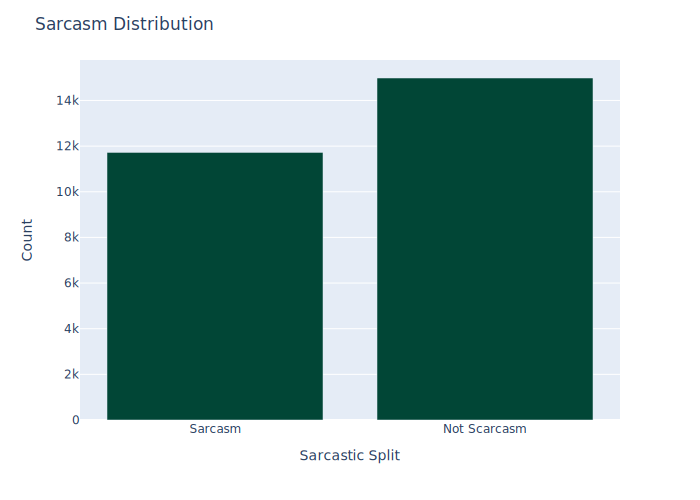

In [27]:
fig = px.bar(sarcastic_count, 
             x = sarcastic_count['is_sarcastic'], 
             y = sarcastic_count['count'], 
             color_discrete_sequence=px.colors.sequential.PuBuGn_r)
fig.update_layout(title = 'Sarcasm Distribution', yaxis_title = 'Count', xaxis_title = 'Sarcastic Split')
fig.show('svg')

## Model Building

In [34]:
tfidf = TfidfVectorizer()

In [35]:
X = df['headline']
Y = df['is_sarcastic']
X_scaled = tfidf.fit_transform(X)

In [36]:
X_scaled

<26708x25292 sparse matrix of type '<class 'numpy.float64'>'
	with 257753 stored elements in Compressed Sparse Row format>

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y, test_size=0.2, random_state=42)

In [43]:
model = BernoulliNB(alpha=1.0,force_alpha=True, binarize=0.0, fit_prior=True, class_prior=None)
model.fit(X_train,Y_train)

BernoulliNB(force_alpha=True)

In [44]:
model.score(X_train,Y_train)

0.9286249180941683

In [47]:
user = input('Enter a Text:')
df = tfidf.transform([user]).toarray()
output = model.predict(df)
print(output)

Enter a Text: mom starting to fear son's web series closest ..


['Sarcasm']
